# EDA

### Table of contents
* [Original data](#orgd)
* [Features](#feat)
* [Our data](#ourd)
* [Features distributions](#dist)
* [Wind plot](#wind)

### Original data<a class="anchor" id="orgd"></a>

The original dataset comes from [Solar Radiation](https://www.kaggle.com/datasets/dronio/SolarEnergy), recommended by the organizers of the BHL.

In [2]:
import pandas as pd
original = pd.read_csv('../data/data/initial_data/SolarPrediction.csv')

In [4]:
print(original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB
None


In [5]:
print(original.describe())

           UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3.268600e+04  32686.000000  32686.000000  32686.000000  32686.000000   
mean   1.478047e+09    207.124697     51.103255     30.422879     75.016307   
std    3.005037e+06    315.916387      6.201157      0.054673     25.990219   
min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
25%    1.475546e+09      1.230000     46.000000     30.400000     56.000000   
50%    1.478026e+09      2.660000     50.000000     30.430000     85.000000   
75%    1.480480e+09    354.235000     55.000000     30.460000     97.000000   
max    1.483265e+09   1601.260000     71.000000     30.560000    103.000000   

       WindDirection(Degrees)         Speed  
count            32686.000000  32686.000000  
mean               143.489821      6.243869  
std                 83.167500      3.490474  
min                  0.090000      0.000000  
25%                 82.227500      3.370000  
50%         

In [7]:
print(original.isnull().sum())

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64


In [9]:
print(original.duplicated().sum())

0


Conclusions:
- there are no NAs in our dataset  
- there are no duplicated rows

### Features<a class="anchor" id="feat"></a>

In our dataset, the **target variable is Radiation**. There are following features (with units):
- Data: month/day/year

- Time: time

- Temperature: degrees Fahrenheit

- Humidity: percent

- Barometric pressure: Hg

- Wind direction: degrees

- Wind speed: miles per hour

- Sunrise/sunset: time

### Our data<a class="anchor" id="ourd"></a>

Our data differs significantly from the original dataset. Here is why.    


The observations were collected every 5 minutes. Since they refer to measures like temperature, 
pressure or humidity, they do not differ much from their closest neighbours. Therefore our solution could experience
unwanted redundancy. **As a consequence, our results would be artificially higher.** It would make our project less
successful in terms of our business goal.

Therefore we aggregated them into hour intervals, e. g. all observations on certain day between 10:00 and 10:59 were aggregated. For columns *temperature*, *wind direction*, *(wind) speed*, *pressure*, *humidity* we have calculated mean, min, max and standard deviation. The latter makes sense, since gusts may occur.

In [42]:
df = pd.read_csv('../data/data/model_data/train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/data/model_data/train.csv'

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Day                 2221 non-null   int64  
 1   Month               2221 non-null   int64  
 2   Hour                2221 non-null   int64  
 3   Mean_Temperature    2221 non-null   float64
 4   Min_Temperature     2221 non-null   int64  
 5   Max_Temperature     2221 non-null   int64  
 6   SD_Temperature      2213 non-null   float64
 7   Mean_Pressure       2221 non-null   float64
 8   Min_Pressure        2221 non-null   float64
 9   Max_Pressure        2221 non-null   float64
 10  SD_Pressure         2213 non-null   float64
 11  Mean_Humidity       2221 non-null   float64
 12  Min_Humidity        2221 non-null   int64  
 13  Max_Humidity        2221 non-null   int64  
 14  SD_Humidity         2213 non-null   float64
 15  Mean_WindDirection  2221 non-null   float64
 16  Min_Wi

In [20]:
print(df.head())

   Day  Month  Hour  Mean_Temperature  Min_Temperature  Max_Temperature  \
0   27     11    17         49.833333               49               51   
1   28      9    17         57.250000               56               58   
2   25      9    20         49.333333               48               51   
3    6     11     0         47.583333               47               48   
4    3      9     2         52.416667               52               53   

   SD_Temperature  Mean_Pressure  Min_Pressure  Max_Pressure  ...  \
0        0.717741      30.446667         30.44         30.45  ...   
1        0.866025      30.380000         30.38         30.38  ...   
2        1.370689      30.465833         30.46         30.47  ...   
3        0.514929      30.485833         30.48         30.49  ...   
4        0.514929      30.411667         30.41         30.42  ...   

   Max_WindDirection  SD_WindDirection  Mean_Speed  Min_Speed  Max_Speed  \
0             167.02         41.862123    7.030000       2

In [21]:
print(df.isnull().sum())

Day                   0
Month                 0
Hour                  0
Mean_Temperature      0
Min_Temperature       0
Max_Temperature       0
SD_Temperature        8
Mean_Pressure         0
Min_Pressure          0
Max_Pressure          0
SD_Pressure           8
Mean_Humidity         0
Min_Humidity          0
Max_Humidity          0
SD_Humidity           8
Mean_WindDirection    0
Min_WindDirection     0
Max_WindDirection     0
SD_WindDirection      8
Mean_Speed            0
Min_Speed             0
Max_Speed             0
SD_Speed              8
Mean_Radiation        0
SunDurationMinutes    0
First_TimeSunRise     0
First_TimeSunSet      0
dtype: int64


In [22]:
print(df.describe())

               Day        Month         Hour  Mean_Temperature  \
count  2221.000000  2221.000000  2221.000000       2221.000000   
mean     15.767672    10.513733    11.603782         51.114082   
std       8.689440     1.101357     6.917250          6.080402   
min       1.000000     9.000000     0.000000         36.083333   
25%       8.000000    10.000000     6.000000         46.500000   
50%      16.000000    10.000000    12.000000         50.000000   
75%      23.000000    11.000000    18.000000         55.166667   
max      31.000000    12.000000    23.000000         70.666667   

       Min_Temperature  Max_Temperature  SD_Temperature  Mean_Pressure  \
count      2221.000000      2221.000000     2213.000000    2221.000000   
mean         50.267897        51.988744        0.636151      30.423116   
std           5.938711         6.288726        0.558272       0.053990   
min          35.000000        37.000000        0.000000      30.190833   
25%          46.000000        47.00

### Features distribution<a class="anchor" id="dist"></a>

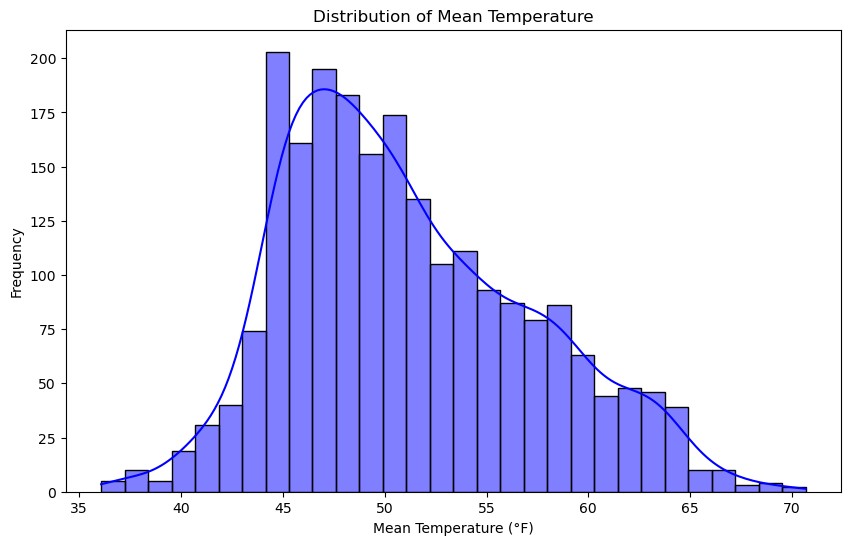

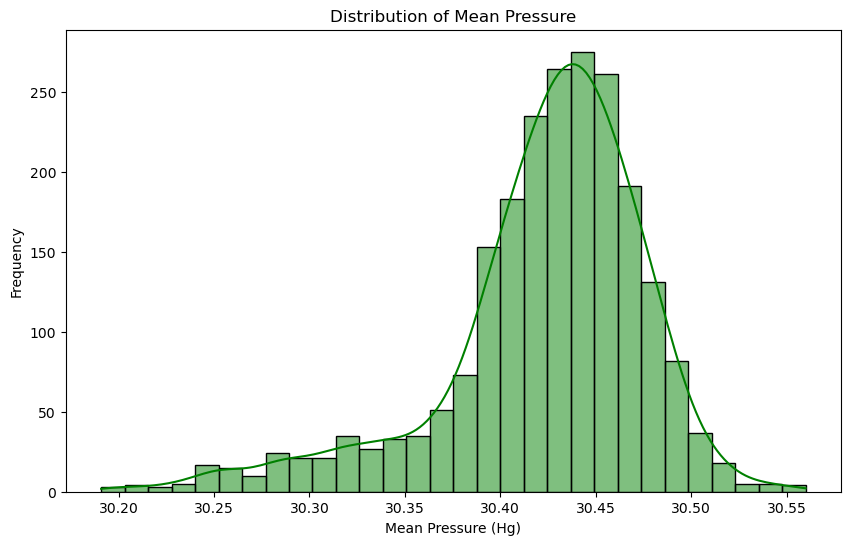

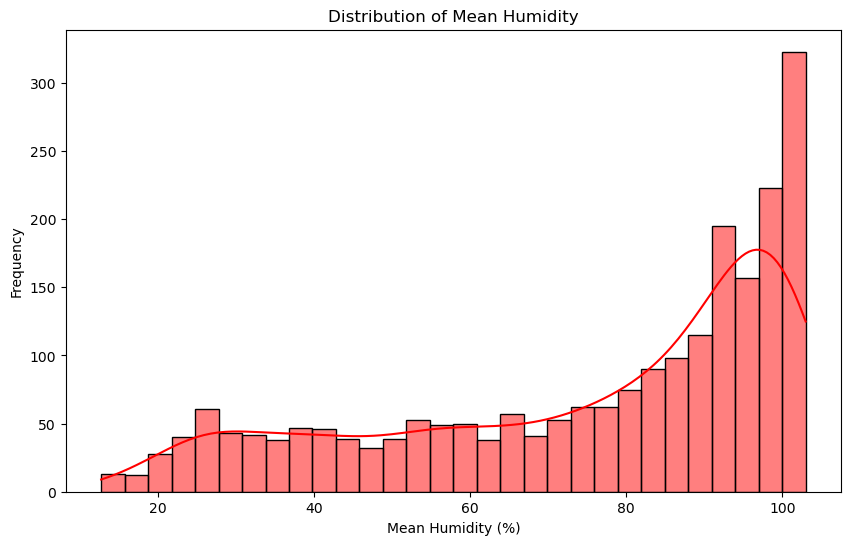

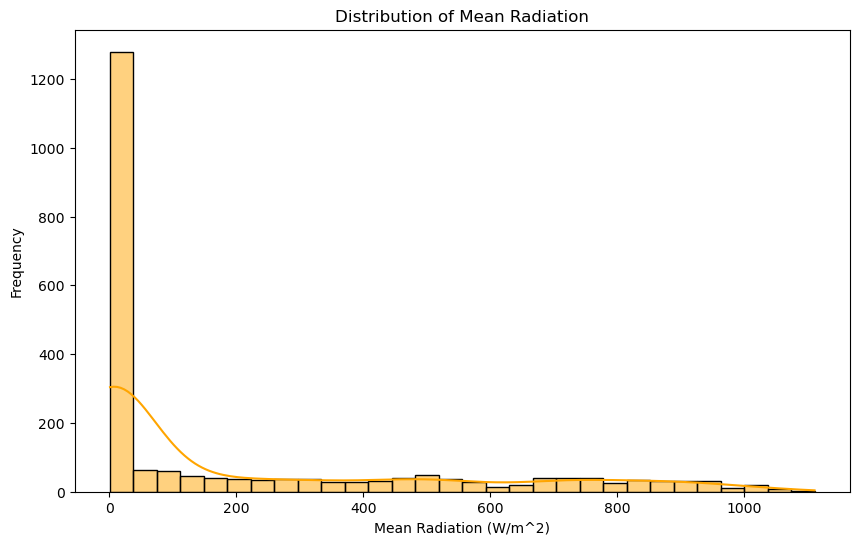

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Mean_Temperature'], kde=True, color='blue', bins=30)
plt.title('Distribution of Mean Temperature')
plt.xlabel('Mean Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Mean_Pressure'], kde=True, color='green', bins=30)
plt.title('Distribution of Mean Pressure')
plt.xlabel('Mean Pressure (Hg)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Mean_Humidity'], kde=True, color='red', bins=30)
plt.title('Distribution of Mean Humidity')
plt.xlabel('Mean Humidity (%)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Mean_Radiation'], kde=True, color='orange', bins=30)
plt.title('Distribution of Mean Radiation')
plt.xlabel('Mean Radiation (W/m^2)')
plt.ylabel('Frequency')
plt.show()

The cause of the distribution of the target variable (Radiation). Our business goal does not work for night hours when the solar power is not generated. Therefore we will only focus on the daylight hours, from sunshine till sunset.

In [46]:
def create_boxplot(data, k=0):
    sunrise_time = pd.to_timedelta(data['First_TimeSunRise']).dt.total_seconds() / 3600
    sunset_time = pd.to_timedelta(data['First_TimeSunSet']).dt.total_seconds() / 3600

    daytime_data = data[(data['Hour'] >= sunrise_time + k) & (data['Hour'] <= sunset_time - k)]
    nighttime_data = data[(data['Hour'] < sunrise_time + k) | (data['Hour'] > sunset_time - k)]

    plt.boxplot(daytime_data['Mean_Radiation'], positions=[1], widths=0.5, labels=['Daytime'])
    plt.boxplot(nighttime_data['Mean_Radiation'], positions=[2], widths=0.5, labels=['Nighttime'])

    plt.title('Box Plot of Mean Radiation')
    plt.xlabel('Time of Day')
    plt.ylabel('Mean Radiation')

    plt.xlim(0.5, 2.5)

    plt.show()

k=0 states when is daytime: we consider interval (sunrise + k, sunset - k)

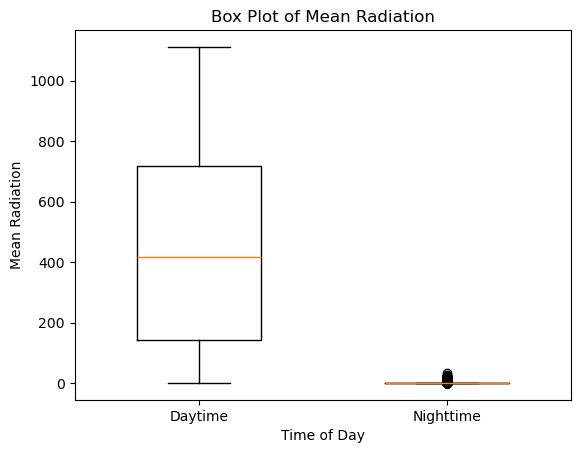

In [47]:
create_boxplot(data=df)

therefore we can omit nighttime, as it doesn't work for our business goal

this will be done later

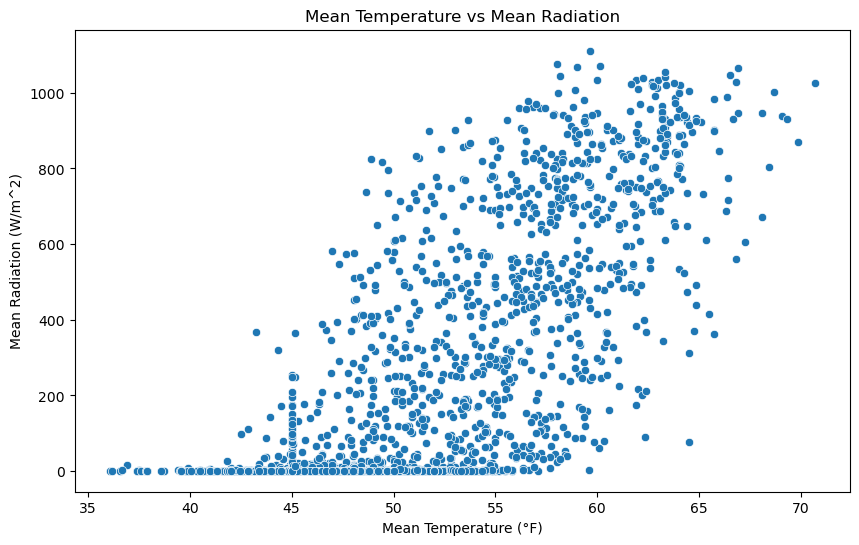

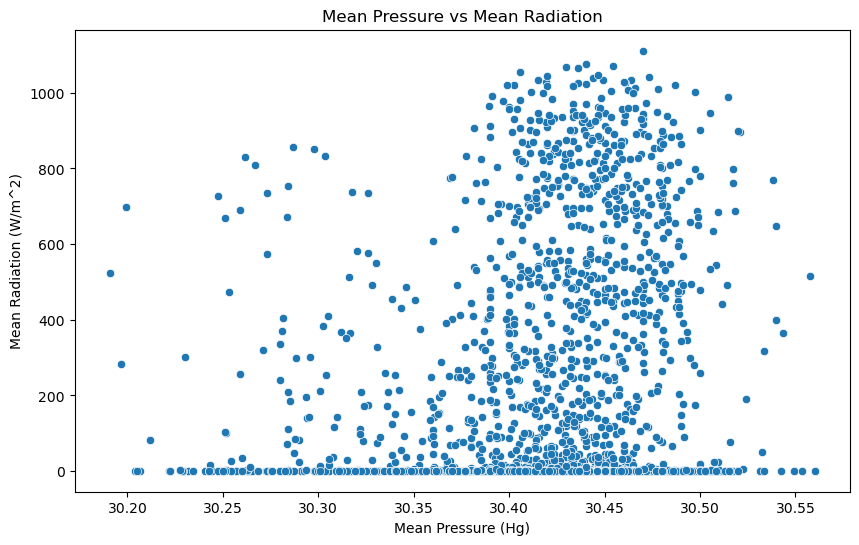

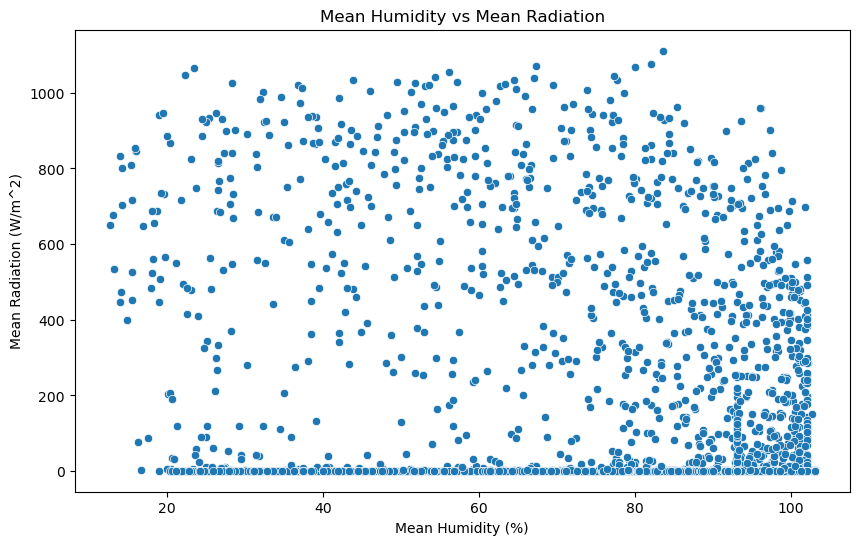

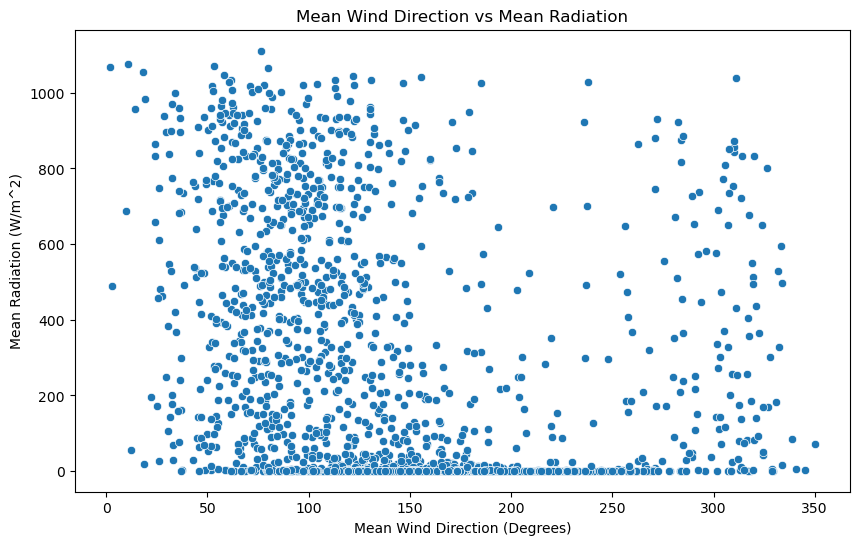

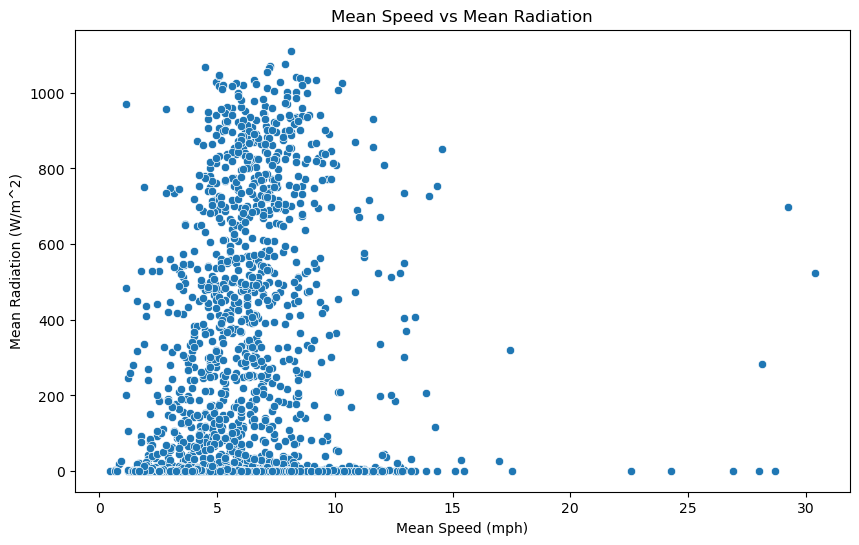

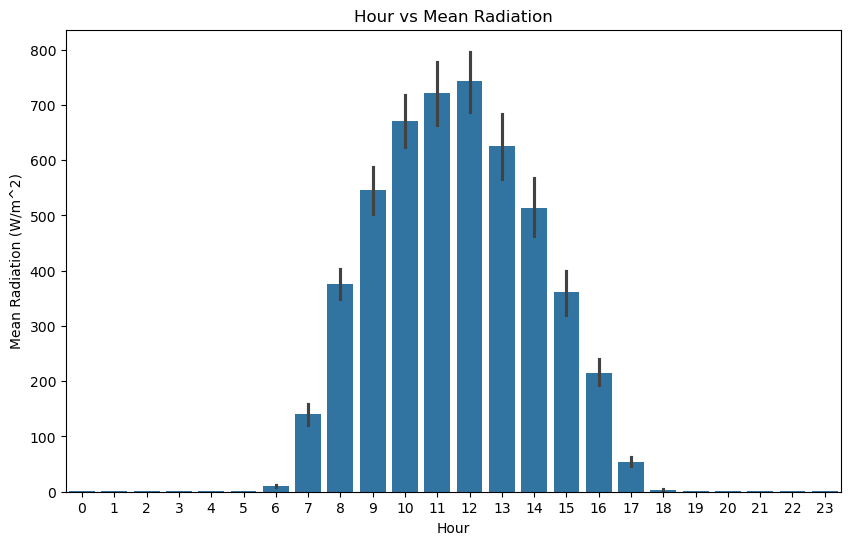

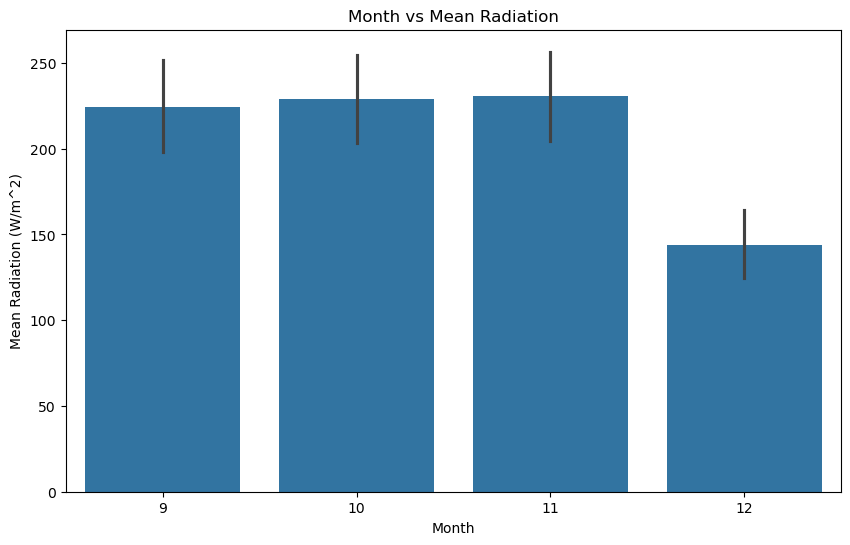

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mean_Temperature', y='Mean_Radiation', data=df)
plt.title('Mean Temperature vs Mean Radiation')
plt.xlabel('Mean Temperature (°F)')
plt.ylabel('Mean Radiation (W/m^2)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mean_Pressure', y='Mean_Radiation', data=df)
plt.title('Mean Pressure vs Mean Radiation')
plt.xlabel('Mean Pressure (Hg)')
plt.ylabel('Mean Radiation (W/m^2)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mean_Humidity', y='Mean_Radiation', data=df)
plt.title('Mean Humidity vs Mean Radiation')
plt.xlabel('Mean Humidity (%)')
plt.ylabel('Mean Radiation (W/m^2)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mean_WindDirection', y='Mean_Radiation', data=df)
plt.title('Mean Wind Direction vs Mean Radiation')
plt.xlabel('Mean Wind Direction (Degrees)')
plt.ylabel('Mean Radiation (W/m^2)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mean_Speed', y='Mean_Radiation', data=df)
plt.title('Mean Speed vs Mean Radiation')
plt.xlabel('Mean Speed (mph)')
plt.ylabel('Mean Radiation (W/m^2)')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Mean_Radiation', data=df)
plt.title('Hour vs Mean Radiation')
plt.xlabel('Hour')
plt.ylabel('Mean Radiation (W/m^2)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Mean_Radiation', data=df)
plt.title('Month vs Mean Radiation')
plt.xlabel('Month')
plt.ylabel('Mean Radiation (W/m^2)')
plt.show()


The linear relation between Radiation on Temperature could be observed. One may also see such relation between Radiation and Wind Speed. 

In the one but last plot, a "normal" distribution could be observed (note that hour in our case is discrete).

What is more, descending tendency could be seen in terms of months.

### Wind plot<a class="anchor" id="wind"></a>

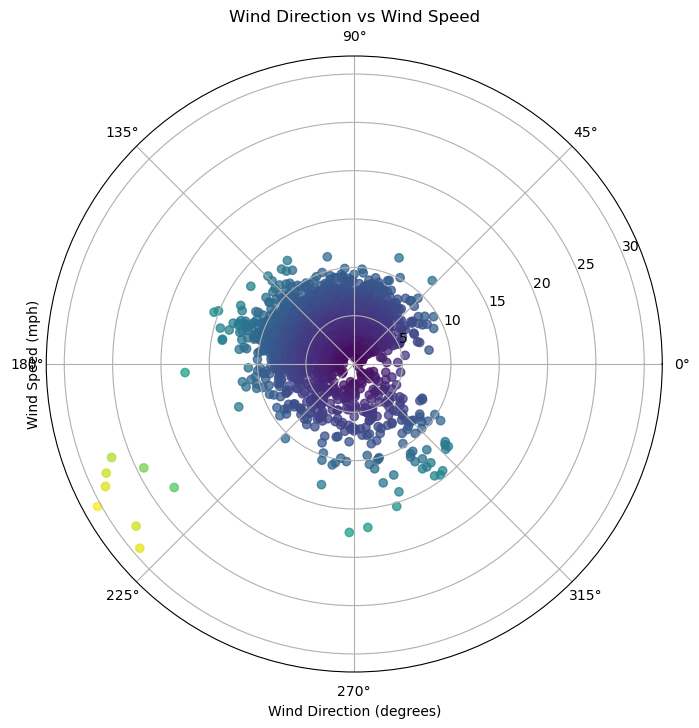

In [ ]:
import numpy as np

wind_direction = df['Mean_WindDirection']
wind_speed = df['Mean_Speed']

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.scatter(np.radians(wind_direction), wind_speed, c=wind_speed, cmap='viridis', alpha=0.75)
ax.set_title('Wind Direction vs Wind Speed')
ax.set_xlabel('Wind Direction (degrees)')
ax.set_ylabel('Wind Speed (mph)')
plt.show()
